# 1ª Avaliação de Aprendizagem de Máquina - 12/11/2020



   * Nome: Itamar de Paiva Rocha Filho
   * Matrícula: 20180026510

### Base de dados

Acesse [https://tmfilho.github.io/akcdata/](https://tmfilho.github.io/akcdata/) e baixe a base de dados sobre as 277 raças de cachorros registradas no _American Kennel Club_. O conjunto contém 20 atributos de diferentes tipos, incluindo atributos textuais, numéricos e categóricos. Altura ( _Height_ ), peso ( _weight_ ) e expectativa de vida ( _life expectancy_ ) aparecem como intervalos \[min, max\]. A tabela abaixo é uma versão traduzida da tabela do site.


|  #  | atributo | descrição | exemplo |
| --- | ------ | ----------- | ------- |
|  1  | description | 1 a 3 parágrafos descrevendo a raça | "Akitas are burly, heavy-boned spitz-type dogs of imposing stature..." |
|  2  | temperament | temperamentoda raça descrito em palavras-chave | "Confident, Famously Funny, Fearless" |
|  3  | popularity  | ranking de popularidade da raça (1-195) | 13 |
|  4  | min_height  | altura mínima em cm | 60.96 |
|  5  | max_height  | altura máxima em cm | 71.12 |
|  6  | min_weight  | peso mínimo em kg | 3.18 |
|  7  | max_weight  | peso máximo em kg | 4.54 |
|  8  | min_expectancy  | expectativa de vida mínima em anos | 10 |
|  9  | max_expectancy  | expectativa de vida máxima em anos | 12 |
|  10  | group  | um de 9 grupos designados pelo AKC (7 grupos principais e 2 extras para raças novas ou que não se ajustam ainda a um grupo clássico) | "Herding Group" |
|  11  | grooming_frequency_value  | Um número que representa a frequência de cuidados com o pelo | 0.4 |
|  12  | grooming_frequency_category  | Categorização dos cuidados com o pelo | "Weekly Brushing" |
|  13  | shedding_value  | Um número que representa a frequência de perda de pelo | 0.6 |
|  14  | shedding_category  | Categorização da perda de pelos | "Seasonal" |
|  15  | energy_level_value  | Um número que representa o nível de energia da raça | 0.8 |
|  16  | energy_level_category  | Categorização do nível de energia | "Energetic" |
|  17  | trainability_value  | Um número que representa a facilidade de treinar a raça | 1.0 |
|  18  | trainability_category  | Uma categorização da facilidade de treinamento | "Eager to Please" |
|  19  | demeanor_value  | Um número que representa a reação da raça a pessoas estranhas e outros animais | 0.6 |
|  20  | demeanor_category  | Categorização da reação da raça a pessoas estranhas e outros animais | "Alert/Responsive" |


## Resolução da prova

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

### Lendo e analisando os dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv", index_col=0)
df.head(3)

,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly


### Análise dos dados

* Vendo as colunas presentes na base de dados

In [3]:
df.columns

Index(['description', 'temperament', 'popularity', 'min_height', 'max_height',
       'min_weight', 'max_weight', 'min_expectancy', 'max_expectancy', 'group',
       'grooming_frequency_value', 'grooming_frequency_category',
       'shedding_value', 'shedding_category', 'energy_level_value',
       'energy_level_category', 'trainability_value', 'trainability_category',
       'demeanor_value', 'demeanor_category'],
      dtype='object')

* Checando os tipos dos dados e a nulidade dos mesmos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, Affenpinscher to Yorkshire Terrier
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description                  277 non-null    object 
 1   temperament                  276 non-null    object 
 2   popularity                   198 non-null    object 
 3   min_height                   277 non-null    float64
 4   max_height                   277 non-null    float64
 5   min_weight                   275 non-null    float64
 6   max_weight                   275 non-null    float64
 7   min_expectancy               274 non-null    float64
 8   max_expectancy               274 non-null    float64
 9   group                        277 non-null    object 
 10  grooming_frequency_value     270 non-null    float64
 11  grooming_frequency_category  270 non-null    object 
 12  shedding_value               257 non-null    float64
 13 

Podemos ver acima que apresentamos alguns valores nulos para algumas espécies

In [5]:
df.loc[df.popularity == "of", "popularity"] = np.nan

In [6]:
df.popularity = df.popularity.astype("float64")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, Affenpinscher to Yorkshire Terrier
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description                  277 non-null    object 
 1   temperament                  276 non-null    object 
 2   popularity                   195 non-null    float64
 3   min_height                   277 non-null    float64
 4   max_height                   277 non-null    float64
 5   min_weight                   275 non-null    float64
 6   max_weight                   275 non-null    float64
 7   min_expectancy               274 non-null    float64
 8   max_expectancy               274 non-null    float64
 9   group                        277 non-null    object 
 10  grooming_frequency_value     270 non-null    float64
 11  grooming_frequency_category  270 non-null    object 
 12  shedding_value               257 non-null    float64
 13 

* Correlação entre colunas

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
popularity,1.000000,0.048636,0.064344,-0.020344,-0.054358,0.139584,0.051369,-0.175239,-0.120208,0.064634,-0.250075,-0.252602
min_height,0.048636,1.000000,0.935146,0.815263,0.792409,-0.460569,-0.463709,-0.186637,0.285123,0.174194,-0.049236,-0.239074
max_height,0.064344,0.935146,1.000000,0.793010,0.806405,-0.441227,-0.467058,-0.244199,0.320306,0.198560,-0.051842,-0.294494
min_weight,-0.020344,0.815263,0.793010,1.000000,0.947519,-0.541745,-0.551445,-0.138691,0.284724,-0.072179,-0.132576,-0.276253
max_weight,-0.054358,0.792409,0.806405,0.947519,1.000000,-0.513515,-0.522455,-0.116240,0.281833,-0.076534,-0.075793,-0.273650
min_expectancy,0.139584,-0.460569,-0.441227,-0.541745,-0.513515,1.000000,0.765434,0.028934,-0.251795,-0.000183,0.091815,0.181565
max_expectancy,0.051369,-0.463709,-0.467058,-0.551445,-0.522455,0.765434,1.000000,0.127438,-0.356471,0.012556,0.094136,0.168534
grooming_frequency_value,-0.175239,-0.186637,-0.244199,-0.138691,-0.116240,0.028934,0.127438,1.000000,-0.070256,-0.151441,0.098834,0.112278
shedding_value,-0.120208,0.285123,0.320306,0.284724,0.281833,-0.251795,-0.356471,-0.070256,1.000000,0.173437,0.043577,-0.179746
energy_level_value,0.064634,0.174194,0.198560,-0.072179,-0.076534,-0.000183,0.012556,-0.151441,0.173437,1.000000,0.119501,-0.003133


* Removendo colunas que não serão utilizadas

In [9]:
df1 = df.copy()

In [10]:
df1 = df1.drop(columns=["description", "grooming_frequency_category", "shedding_category", "energy_level_category", "trainability_category", "demeanor_category"])

* Checando dados nulos

In [11]:
print("Porcentagem de dados faltantes")
np.round(df1.isnull().sum()/df1.shape[0] * 100,2)

Porcentagem de dados faltantes


temperament                  0.36
popularity                  29.60
min_height                   0.00
max_height                   0.00
min_weight                   0.72
max_weight                   0.72
min_expectancy               1.08
max_expectancy               1.08
group                        0.00
grooming_frequency_value     2.53
shedding_value               7.22
energy_level_value           2.17
trainability_value           8.66
demeanor_value               9.03
dtype: float64

* Tratando os valores faltantes Numéricos com KNNimputer

In [12]:
from sklearn.impute import KNNImputer

In [13]:
float_columns = ["popularity", "min_height", "max_height", "min_weight", "max_weight", "min_expectancy", "max_expectancy", "grooming_frequency_value", "shedding_value", "energy_level_value", "trainability_value", "demeanor_value"]

In [14]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
transformed = pd.DataFrame(imputer.fit_transform(df1[float_columns]), columns=float_columns, index=df1.index)

In [15]:
df1[float_columns] = transformed

In [16]:
df1

,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
Affenpinscher,"Confident, Famously Funny, Fearless",148.000000,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
Afghan Hound,"Dignified, Profoundly Loyal, Aristocratic",113.000000,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
Airedale Terrier,"Friendly, Clever, Courageous",60.000000,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
Akita,"Courageous, Dignified, Profoundly Loyal",47.000000,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
Alaskan Malamute,"Affectionate, Loyal, Playful",58.000000,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wirehaired Vizsla,"Gentle, Loyal, Trainable",167.000000,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
Working Kelpie,"Alert, Eager, Intelligent",84.000000,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
Xoloitzcuintli,"Loyal, Alert, Calm",140.000000,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
Yakutian Laika,"Affectionate, Intelligent, Active",57.333333,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


In [17]:
print("Porcentagem de dados faltantes")
np.round(df1.isnull().sum()/df1.shape[0] * 100,2)

Porcentagem de dados faltantes


temperament                 0.36
popularity                  0.00
min_height                  0.00
max_height                  0.00
min_weight                  0.00
max_weight                  0.00
min_expectancy              0.00
max_expectancy              0.00
group                       0.00
grooming_frequency_value    0.00
shedding_value              0.00
energy_level_value          0.00
trainability_value          0.00
demeanor_value              0.00
dtype: float64

In [18]:
categorical_missing_features = ["temperament"]

In [19]:
df1[categorical_missing_features].mode()

,temperament
0,"Friendly, Smart, Willing to Please"


In [20]:
df2 = df1.copy()

In [21]:
for column in categorical_missing_features:
    df2[column] = df1[column].fillna(df1[column].mode()[0])

In [22]:
print("Porcentagem de dados faltantes")
np.round(df2.isnull().sum()/df2.shape[0] * 100,2)

Porcentagem de dados faltantes


temperament                 0.0
popularity                  0.0
min_height                  0.0
max_height                  0.0
min_weight                  0.0
max_weight                  0.0
min_expectancy              0.0
max_expectancy              0.0
group                       0.0
grooming_frequency_value    0.0
shedding_value              0.0
energy_level_value          0.0
trainability_value          0.0
demeanor_value              0.0
dtype: float64

A coluna temperamento tem uma amostragem diferente pra cada caso praticamente.

In [23]:
df2.temperament

Affenpinscher              Confident, Famously Funny, Fearless
Afghan Hound         Dignified, Profoundly Loyal, Aristocratic
Airedale Terrier                  Friendly, Clever, Courageous
Akita                  Courageous, Dignified, Profoundly Loyal
Alaskan Malamute                  Affectionate, Loyal, Playful
                                       ...                    
Wirehaired Vizsla                     Gentle, Loyal, Trainable
Working Kelpie                       Alert, Eager, Intelligent
Xoloitzcuintli                              Loyal, Alert, Calm
Yakutian Laika               Affectionate, Intelligent, Active
Yorkshire Terrier           Affectionate, Sprightly, Tomboyish
Name: temperament, Length: 277, dtype: object

In [24]:
df2

,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
Affenpinscher,"Confident, Famously Funny, Fearless",148.000000,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
Afghan Hound,"Dignified, Profoundly Loyal, Aristocratic",113.000000,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
Airedale Terrier,"Friendly, Clever, Courageous",60.000000,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
Akita,"Courageous, Dignified, Profoundly Loyal",47.000000,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
Alaskan Malamute,"Affectionate, Loyal, Playful",58.000000,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wirehaired Vizsla,"Gentle, Loyal, Trainable",167.000000,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
Working Kelpie,"Alert, Eager, Intelligent",84.000000,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
Xoloitzcuintli,"Loyal, Alert, Calm",140.000000,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
Yakutian Laika,"Affectionate, Intelligent, Active",57.333333,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


Contudo, podemos notar que são categorias separadas com vírgulas, mas que seguem um determinado padrão e, portanto, podem ser separadas em colunas indicando se a raça possui ou não essa categoria, como faremos na célula  a seguir:

In [25]:
df2.temperament["Affenpinscher"].split(", ")

['Confident', 'Famously Funny', 'Fearless']

In [26]:
dict_charac = []
for characteristics, indexation in zip(df2.temperament, df2.index):
    try:
        for splits in characteristics.split(", "):
            if splits not in df2.columns:
                dict_charac.append(splits)
                df2[splits] = 0
            df2.loc[indexation, splits] = 1
    except:
        print(f"value : {characteristics} , index : {indexation}")

In [27]:
df2.drop(columns=["temperament"], inplace=True)

In [28]:
df2

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,...,Keenly Alert,Good-Tempered,Canny,Deeply Devoted,Playful but also Work-Oriented. Very Active and Upbeat.,Courteous,Entertaining,Gregarious,Sprightly,Tomboyish
Affenpinscher,148.000000,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,...,0,0,0,0,0,0,0,0,0,0
Afghan Hound,113.000000,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,...,0,0,0,0,0,0,0,0,0,0
Airedale Terrier,60.000000,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,...,0,0,0,0,0,0,0,0,0,0
Akita,47.000000,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,...,0,0,0,0,0,0,0,0,0,0
Alaskan Malamute,58.000000,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wirehaired Vizsla,167.000000,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,...,0,0,0,0,0,0,0,0,0,0
Working Kelpie,84.000000,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,...,0,0,0,0,0,0,0,0,0,0
Xoloitzcuintli,140.000000,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,...,0,0,0,0,0,0,0,0,0,0
Yakutian Laika,57.333333,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,...,0,0,0,0,0,0,0,0,0,0


## Resolução das questões

<hr>

**Questão 1 (1,0 ponto)** É possível extrair tarefas de classificação ou de regressão dessa base? Que variáveis poderiam ser alvos nessas tarefas e quais seriam os atributos/variáveis independentes? **Ainda não vimos processamento de linguagem, então podem desconsiderar a variável description**.

In [29]:
df1.head(3)

,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
Affenpinscher,"Confident, Famously Funny, Fearless",148.0,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
Afghan Hound,"Dignified, Profoundly Loyal, Aristocratic",113.0,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
Airedale Terrier,"Friendly, Clever, Courageous",60.0,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8


Sim, é possível extrair tarefas de classificação ou regressão a partir dos dados apresentados.

**Regressão**
Para uma tarefa de regressão, faria mais sentido prever a popularidade, utilizando os outros dados como variáveis para executar essa tarefa. Contudo, também poderíamos criar um modelo de regressão para prever qualquer um dos dados numéricos, embora no caso mostrado isso não faça muito sentido.

**Classificação**
Para uma tarefa de classificação, poderíamos prever: O group e o temperamento (o que precisaria de um refinamento maior e possivelmente mais dados), usando as outras variáveis presentes nos nossos dados.

<hr>

**Questão 2 (1,0 ponto)** Como você trataria as variáveis categóricas nessas tarefas? Faça esse tratamento e mostre a DataFrame resultante.

<hr>

O tratamento deveria ser feito com o onehotencoding para as variáveis que não tem um **hierarquia** nos seus exemplos, mas apenas uma divisão categórica, como é o caso da coluna *group* e pode ser utilizado uma representação numérica inteira ou fracionária para colunas que têm uma hierarquia em seus valores, como a **energy_level_category** (que foi removida, mas segue representada pela **energy_level_value**)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
df2.head()

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,...,Keenly Alert,Good-Tempered,Canny,Deeply Devoted,Playful but also Work-Oriented. Very Active and Upbeat.,Courteous,Entertaining,Gregarious,Sprightly,Tomboyish
Affenpinscher,148.0,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,...,0,0,0,0,0,0,0,0,0,0
Afghan Hound,113.0,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,...,0,0,0,0,0,0,0,0,0,0
Airedale Terrier,60.0,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,...,0,0,0,0,0,0,0,0,0,0
Akita,47.0,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,...,0,0,0,0,0,0,0,0,0,0
Alaskan Malamute,58.0,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,...,0,0,0,0,0,0,0,0,0,0


In [32]:
ohe = OneHotEncoder(sparse=False)
grupos = pd.DataFrame(ohe.fit_transform(df2['group'].values.reshape(-1, 1)), columns=list(ohe.categories_[0]), index=df2.index)

In [33]:
df3 = df2.drop(columns=["group"])

In [34]:
df3 = df3.join(grupos, how="outer")

In [35]:
df3

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,...,Tomboyish,Foundation Stock Service,Herding Group,Hound Group,Miscellaneous Class,Non-Sporting Group,Sporting Group,Terrier Group,Toy Group,Working Group
Affenpinscher,148.000000,22.86,29.21,3.175147,4.535924,12.0,15.0,0.6,0.6,0.6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Afghan Hound,113.000000,63.50,68.58,22.679619,27.215542,12.0,15.0,0.8,0.2,0.8,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Airedale Terrier,60.000000,58.42,58.42,22.679619,31.751466,11.0,14.0,0.6,0.4,0.6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Akita,47.000000,60.96,71.12,31.751466,58.967008,10.0,13.0,0.8,0.6,0.8,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Alaskan Malamute,58.000000,58.42,63.50,34.019428,38.555351,10.0,14.0,0.6,0.6,0.8,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wirehaired Vizsla,167.000000,54.61,63.50,20.411657,29.483504,12.0,14.0,0.2,0.6,0.8,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Working Kelpie,84.000000,48.26,63.50,12.700586,27.215542,12.0,15.0,0.2,0.6,0.8,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xoloitzcuintli,140.000000,25.40,58.42,4.535924,24.947580,13.0,18.0,0.2,0.2,0.8,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Yakutian Laika,57.333333,53.34,58.42,18.143695,24.947580,10.0,12.0,0.4,0.6,0.8,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<hr>

**Questão 3 (1,0 ponto)** As variáveis tem escalas diferentes. Como você trataria essa situação para não prejudicar o desempenho de modelos que são sensíveis a isso? Faça esse tratamento e mostre a DataFrame resultante.

<hr>

Poderíamos fazê-lo utilizando diversas técnicas de pre processamento. Para esse caso, utilizaremos MinMax Scaler, que colocar os valores das variáveis em um range de 0-1 de forma padrão.

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df4 = scaler.fit_transform(df3)

In [37]:
df4.shape

(277, 161)

<hr>

**Questão 4 (1,5 ponto)** Suponha uma tarefa que envolva predizer a popularidade de uma raça. Essa é uma tarefa de regressão ou de classificação? Selecione atributos para usar como variáveis independentes nessa tarefa. Faça uma análise de importância das variáveis realizando testes de coeficientes do ajuste linear e usando os valores de importância dados por um modelo de árvore de decisão. Note que alguns valores podem estar faltando para certas raças. **Pode usar bibliotecas relevantes. Não é necessário implementar do zero**.

<hr>

Neste caso, precisaremos mudar o valor da popularidade para antes da imputation dos valores faltantes. Como não temos certeza se os valores que usamos estão corretos, eles podem acabar influenciando de forma negativamente o modelo. Assim, descartaremos os valores que não foram nos passados.

In [50]:
df5 = df3.copy()

In [51]:
df5["popularity"] = df["popularity"]

In [52]:
df5.isnull().sum()

popularity            82
min_height             0
max_height             0
min_weight             0
max_weight             0
                      ..
Non-Sporting Group     0
Sporting Group         0
Terrier Group          0
Toy Group              0
Working Group          0
Length: 161, dtype: int64

In [53]:
df5 = df5.dropna()

In [63]:
y = df5["popularity"]

In [55]:
X = df5.drop(columns=["popularity"])

In [56]:
#fazendo o scalling novamente
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [64]:
X.shape, y.shape

((195, 160), (195,))

A tarefa pode ser tanto de regressão quanto de classificação. Contudo, ao utilizarmos uma classificação os valores ficariam **restritos** às classes apresentadas, embora a definição varie de 1 a 195. Com a regressão seria possível uma estrapolação desses valores. Abaixo está mostrado o máximo, mínimo e o número de valores diferentes.

In [70]:
max(y), min(y)

(192.0, 1.0)

In [74]:
y.unique().shape[0]

190

<hr>

**Questão 5 (2,0 pontos)** Faça uma avaliação de desempenho dos modelos que vimos até agora no curso, considerando a tarefa de predizer a popularidade da raça e usando validação cruzada.

<hr>

In [86]:
data = pd.DataFrame(X, index=y.index).join(y)
data

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,popularity
Affenpinscher,0.16,0.18,0.046667,0.043478,0.800000,0.789474,0.50,0.50,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,148.0
Afghan Hound,0.80,0.80,0.333333,0.260870,0.800000,0.789474,0.75,0.00,0.75,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
Airedale Terrier,0.72,0.64,0.333333,0.304348,0.733333,0.736842,0.50,0.25,0.50,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0
Akita,0.76,0.84,0.466667,0.565217,0.666667,0.684211,0.75,0.50,0.75,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
Alaskan Malamute,0.72,0.72,0.500000,0.369565,0.666667,0.736842,0.50,0.50,0.75,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wire Fox Terrier,0.40,0.32,0.100000,0.078261,0.800000,0.789474,0.25,0.00,0.50,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.0
Wirehaired Pointing Griffon,0.60,0.68,0.233333,0.304348,0.800000,0.789474,0.25,0.50,1.00,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
Wirehaired Vizsla,0.66,0.72,0.300000,0.282609,0.800000,0.736842,0.00,0.50,0.75,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,167.0
Xoloitzcuintli,0.20,0.64,0.066667,0.239130,0.866667,0.947368,0.00,0.00,0.75,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140.0


In [76]:
from pycaret.regression import * 

In [88]:
reg = setup(data=data, target="popularity")

 
Setup Succesfully Completed.


,Description,Value
0,session_id,8951
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(195, 161)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,140
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [90]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


Com a função compare_models, podemos rodar de forma rápida e prática os algoritmos vistos em classe com 10 folds e em apenas uma linha de código, como pode ser visto abaixo:

In [93]:
compare_models(include=["lr", "lasso", "ridge", "en", "svm", "knn", "dt", "mlp"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,44.8763,2848.7428,52.9242,0.0022,0.8943,1.9761,0.0037
1,Elastic Net,46.7611,2966.1098,54.1185,-0.0104,0.9535,2.5809,0.0036
2,Lasso Regression,46.9424,3132.8645,55.2719,-0.0552,0.9662,2.5135,0.0037
3,Multi Level Perceptron,48.0465,3101.4165,55.4265,-0.0616,0.9653,2.6676,0.2565
4,Support Vector Machine,48.4067,3166.0739,56.0201,-0.0892,0.9822,2.8153,0.0076
5,Ridge Regression,54.4332,4814.0242,67.4873,-0.5861,1.0770,2.2710,0.0037
6,Decision Tree,55.6297,5023.0802,69.4586,-0.7020,1.0150,1.6964,0.0051
7,Linear Regression,372016303366073.8750,1192573574777548044519228833792.0000,796582160872201.8750,-478253520223123363571171328.0000,18.1872,7370147554745.4668,0.0065


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

Tivemos um melhor desempenho com o KNN para regressão.

<hr>

**Questão 6 (1,5 pontos)** Suponha uma tarefa que envolva predizer o grupo de uma raça. Essa é uma tarefa de regressão ou de classificação? Selecione variáveis para usar como atributos nessa tarefa. Faça uma análise de importância das variáveis realizando testes de coeficientes do ajuste linear e usando os valores de importância dados por um modelo de árvore de decisão. **Pode usar bibliotecas relevantes. Não é necessário implementar do zero**. Nota: as classes _Foundation Stock Service_ e _Miscellaneous Class_ são classes não-descritivas e podem ser desconsideradas.

<hr>

In [ ]:
pass

<hr>

**Questão 7 (2,0 ponto)** Faça uma avaliação de desempenho dos modelos que vimos até agora no curso, considerando a tarefa de predizer o grupo da raça e usando validação cruzada. Avalie acurácia e precisão e cobertura por classe. Mostre a matriz de confusão do melhor de todos os modelos ajustados durante a validação cruzada.

<hr>

In [95]:
from pycaret.classification import *

In [97]:
X_class = df2.drop(columns=["group"])

In [98]:
y_class = df2["group"]

In [99]:
#fazendo o scalling novamente
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_class = scaler.fit_transform(X_class)

In [100]:
classification_data = pd.DataFrame(X_class, index = y_class.index).join(y_class)
classification_data

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,group
Affenpinscher,0.769634,0.16,0.160714,0.046667,0.041667,0.7500,0.789474,0.50,0.50,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Group
Afghan Hound,0.586387,0.80,0.714286,0.333333,0.250000,0.7500,0.789474,0.75,0.00,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hound Group
Airedale Terrier,0.308901,0.72,0.571429,0.333333,0.291667,0.6875,0.736842,0.50,0.25,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Terrier Group
Akita,0.240838,0.76,0.750000,0.466667,0.541667,0.6250,0.684211,0.75,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Working Group
Alaskan Malamute,0.298429,0.72,0.642857,0.500000,0.354167,0.6250,0.736842,0.50,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Working Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wirehaired Vizsla,0.869110,0.66,0.642857,0.300000,0.270833,0.7500,0.736842,0.00,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sporting Group
Working Kelpie,0.434555,0.56,0.642857,0.186667,0.250000,0.7500,0.789474,0.00,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Foundation Stock Service
Xoloitzcuintli,0.727749,0.20,0.571429,0.066667,0.229167,0.8125,0.947368,0.00,0.00,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Sporting Group
Yakutian Laika,0.294939,0.64,0.571429,0.266667,0.229167,0.6250,0.631579,0.25,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Foundation Stock Service


In [101]:
classficador = setup(data=classification_data, target="group")

Setup Succesfully Completed!


,Description,Value
0,session_id,1767
1,Target Type,Multiclass
2,Label Encoded,"Foundation Stock Service: 0, Herding Group: 1, Hound Group: 2, Miscellaneous Class: 3, Non-Sporting Group: 4, Sporting Group: 5, Terrier Group: 6, Toy Group: 7, Working Group: 8"
3,Original Data,"(277, 153)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,140
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [102]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [107]:
best = compare_models(include=["lr", "knn", "dt", "svm", "mlp", "ridge"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.3676,0.0000,0.2958,0.3170,0.3202,0.2461,0.2568,0.0573
1,K Neighbors Classifier,0.3521,0.0000,0.2503,0.2861,0.2807,0.2035,0.2260,0.0040
2,MLP Classifier,0.3305,0.0000,0.2750,0.3149,0.2978,0.2161,0.2238,0.7678
3,SVM - Linear Kernel,0.3158,0.0000,0.2629,0.2702,0.2664,0.1993,0.2158,0.1078
4,Ridge Classifier,0.3158,0.0000,0.2494,0.2886,0.2837,0.1930,0.1994,0.0059
5,Decision Tree Classifier,0.2639,0.0000,0.2343,0.2760,0.2541,0.1418,0.1455,0.0056


In [110]:
tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4000,0.0000,0.3444,0.4333,0.3900,0.3043,0.3088
1,0.3000,0.0000,0.3370,0.4083,0.3024,0.2090,0.2244
2,0.4000,0.0000,0.2963,0.5183,0.4194,0.3162,0.3218
3,0.3684,0.0000,0.4271,0.3509,0.3356,0.2785,0.2955
4,0.4737,0.0000,0.4352,0.5044,0.4729,0.3987,0.4065
5,0.2105,0.0000,0.1556,0.1930,0.2000,0.0806,0.0812
6,0.1053,0.0000,0.0444,0.1053,0.1053,-0.0419,-0.0429
7,0.2632,0.0000,0.2111,0.1825,0.2075,0.1474,0.1540
8,0.3684,0.0000,0.3556,0.6491,0.3930,0.2985,0.3191
9,0.4737,0.0000,0.3667,0.4561,0.4510,0.3811,0.3876


LogisticRegression(C=1.088, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1767, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

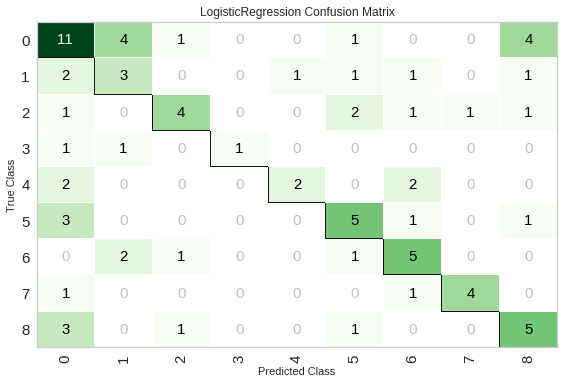

In [112]:
plot_model(best, plot="confusion_matrix")

In [114]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4762,0,0.4607,0.5076,0.478,0.3852,0.3866


,0,1,2,3,4,5,6,7,8,9,...,148_1.0,149_0.0,149_1.0,150_0.0,150_1.0,151_0.0,151_1.0,group,Label,Score
0,0.136126,0.56,0.464286,0.266667,0.208333,0.750000,0.736842,0.25,0.250000,0.50,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Sporting Group,Foundation Stock Service,0.4031
1,0.699825,0.64,0.714286,0.300000,0.291667,0.750000,0.789474,0.25,0.500000,0.75,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Foundation Stock Service,Herding Group,0.5518
2,0.287958,0.48,0.535714,0.233333,0.229167,0.625000,0.631579,0.25,0.416667,0.50,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Foundation Stock Service,Herding Group,0.6432
3,0.670157,0.51,0.446429,0.200000,0.229167,0.729167,0.754386,0.00,0.500000,0.50,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Foundation Stock Service,Foundation Stock Service,0.5985
4,0.026178,0.32,0.285714,0.086667,0.125000,0.625000,0.789474,0.50,0.500000,0.75,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Hound Group,Sporting Group,0.4111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.382199,0.74,0.767857,0.566667,0.583333,0.500000,0.578947,0.25,0.500000,0.75,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Working Group,Foundation Stock Service,0.6789
80,0.010471,0.66,0.607143,0.366667,0.312500,0.625000,0.631579,0.25,0.500000,1.00,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Sporting Group,Foundation Stock Service,0.5584
81,0.083770,0.76,0.750000,0.400000,0.416667,0.625000,0.631579,0.00,0.750000,1.00,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Working Group,Working Group,0.6048
82,0.345550,0.72,0.678571,0.660000,0.458333,0.312500,0.421053,0.00,0.750000,0.50,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Working Group,Working Group,0.5062


In [115]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…